<a href="https://colab.research.google.com/github/alvafox/Simulaciones-para-Becas-Chile/blob/main/Mag%C3%ADster_BCH_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAGISTER BCH 2022**
---


**Instrucción:** Para Magister se quiere bajar la ponderación de Institución de destino desde 40% a 30% (-10%), entregando ese 10% a intereses (+5%) y retribución (+5%)

**Hallazgos:** Al redistribuir el 10% del puntaje otorgado a la Institución de destino, entre Intereses (2.2) y Retribución (2.3), finalmente el número de seleccionados disminuye.

- Es importante remarcar que de 178 seleccionados, se pasa a 151 (-15%).
- Una menor ponderación sobre la IAD desfavorece el puntaje final de los postulantes, lo que eventualmente podría impactar en puntajes de corte más bajos (línea verde en 45º).
- El concurso se vuelve menos competitivo, dado que la redistrubución de ponderaciones se incorpora a subcriterios que tienen un desempeño menor.
- Bajo el supuesto de mantener el puntaje de corte, al realizar la nueva distribución de ponderaciones, se estarían otorgando menos becas.
- Notar que al ser un concurso con un volumen de adjudicación bajo, en comparación a los concursos nacionales, el efecto de las brechas de género en cada comité, pierde relevancia (son números muy pequeños).
- A nivel concurso, la nueva ponderación desfavorece tanto al género masculino (de 83 a 72 adjudicados), como al femeninino (de 95 a 79 adjuducadas) pero de igual forma la adjudicación está a favor del género femenino en términos absolutos.


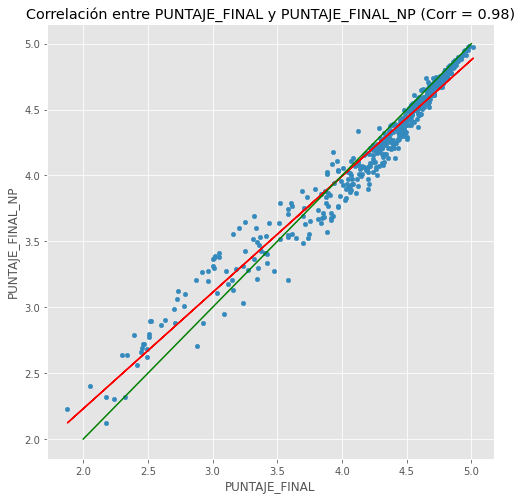

|                |   DELTA |
|:---------------|--------:|
| BAJA PUNTAJE   |     370 |
| FUERA DE BASES |     102 |
| SUBE PUNTAJE   |      97 |
| MANTIENE       |      36 |


|                 |   count |    mean |      std |   min |    25% |   50% |   75% |   max |
|:----------------|--------:|--------:|---------:|------:|-------:|------:|------:|------:|
| AAP             |     503 | 4.07041 | 0.637742 | 1.797 | 3.7445 | 4.236 | 4.531 |     5 |
| SUBCRITERIO 1.2 |     503 | 3.84652 | 0.894863 | 0.75  | 3.25   | 4     | 4.5   |     5 |
| SUBCRITERIO 1.3 |     503 | 4.18688 | 0.756029 | 1     | 3.75   | 4.25  | 4.75  |     5 |
| SUBCRITERIO 1.4 |     503 | 4.39573 | 0.615711 | 2     | 4      | 4.5   | 5     |     5 |
| SUBCRITERIO 2.1 |     503 | 3.81113 | 0.884441 | 0.5   | 3.25   | 4     | 4.5   |     5 |
| SUBCRITERIO 2.2 |     503 | 4.11581 | 0.775068 | 0.5   | 3.75   | 4.25  | 4.75  |     5 |
| SUBCRITERIO 2.3 |     503 | 4.00099 | 0.832452 | 0.5   | 3.5    | 4.25  | 4.5   |     5 |
| SUBCRITERIO 3.1 |     503 | 4.36344 | 1.25555  | 0     | 4.475  | 5     | 5     |     5 |



In [ ]:
!pip install matplotlib==3.4.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.precision', 3)
pd.set_option('display.max_rows', 200)

In [ ]:
df_mag = pd.read_csv("/content/drive/MyDrive/MAG BCH 2022.csv", sep=";",encoding="latin-1", decimal=",", thousands=".")

In [ ]:
df_mag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FOLIO                        605 non-null    int64  
 1   COMITÉ                       605 non-null    object 
 2   Área OCDE                    605 non-null    object 
 3   ESTADO ADMISIBILIDAD         605 non-null    object 
 4   NOTA PREGRADO                605 non-null    float64
 5   TIPO RANKING                 605 non-null    object 
 6   RANKING                      605 non-null    int64  
 7   TOTAL                        605 non-null    int64  
 8   % RANKING                    605 non-null    float64
 9   Y                            605 non-null    float64
 10  P                            605 non-null    float64
 11  PQ                           605 non-null    float64
 12  Q                            605 non-null    float64
 13  Rx                  

In [ ]:
df_mag

,FOLIO,COMITÉ,Área OCDE,ESTADO ADMISIBILIDAD,NOTA PREGRADO,TIPO RANKING,RANKING,TOTAL,% RANKING,Y,...,AAFF,PUNTAJE_FINAL,PUNTAJE_FINAL_NP,ESTADO_FINAL,ESTADO_FINAL_NP,DELTA,FECHA NAC,EDAD,RANGO,GÉNERO
0,73220001,Derecho,CIENCIAS SOCIALES,ADMISIBLE,6.00,EGRESO,11,130,8.462,4.167,...,-,3.648,3.528,NO SELECCIONADA,NO SELECCIONADA,BAJA,27-12-1989,32,"[30, 35[",Masculino
1,73220002,Cs. Médicas,CIENCIAS MEDICAS Y DE SALUD,FUERA DE BASES,5.30,TITULO,126,146,86.301,0.000,...,-,0.000,0.000,FUERA DE BASES,FUERA DE BASES,FUERA DE BASES,14-02-1990,32,"[30, 35[",Masculino
2,73220003,Políticas Públicas y Administración del Estado,CIENCIAS SOCIALES,ADMISIBLE,5.90,EGRESO,47,454,10.352,4.068,...,NO,4.394,4.231,NO SELECCIONADA,NO SELECCIONADA,BAJA,13-01-1987,35,"[35, 40[",Masculino
3,73220004,Cs. de la Ingeniería I,INGENIERIA Y TECNOLOGIA,ADMISIBLE,7.00,EGRESO,1,143,0.699,5.000,...,NO,4.975,4.975,SELECCIONADA,SELECCIONADA,MANTIENE,07-01-1994,28,"[25, 30[",Femenino
4,73220005,Políticas Públicas y Administración del Estado,CIENCIAS SOCIALES,ADMISIBLE,5.90,EGRESO,24,74,32.432,4.068,...,-,3.085,2.947,NO SELECCIONADA,NO SELECCIONADA,BAJA,08-05-1990,32,"[30, 35[",Femenino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,73220601,Cs. Médicas,CIENCIAS MEDICAS Y DE SALUD,ADMISIBLE,6.10,EGRESO,16,123,13.008,4.262,...,-,4.201,3.901,NO SELECCIONADA,NO SELECCIONADA,BAJA,03-05-1994,28,"[25, 30[",Masculino
601,73220602,Derecho,CIENCIAS SOCIALES,FUERA DE BASES,4.95,EGRESO,25,60,41.667,0.000,...,NO,0.000,0.000,FUERA DE BASES,FUERA DE BASES,FUERA DE BASES,21-10-1993,28,"[25, 30[",Femenino
602,73220603,Cs. Políticas y Estudios Internacionales,CIENCIAS SOCIALES,ADMISIBLE,5.60,EGRESO,71,90,78.889,3.750,...,-,3.340,3.211,NO SELECCIONADA,NO SELECCIONADA,BAJA,13-05-1997,25,"[25, 30[",Masculino
603,73220604,Biotecnología,CIENCIAS NATURALES,ADMISIBLE,6.00,NO RANKING,0,0,0.000,4.167,...,-,4.071,4.006,NO SELECCIONADA,NO SELECCIONADA,BAJA,15-10-1999,22,"[0, 25[",Femenino


# **TODOS LOS PUNTAJES**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


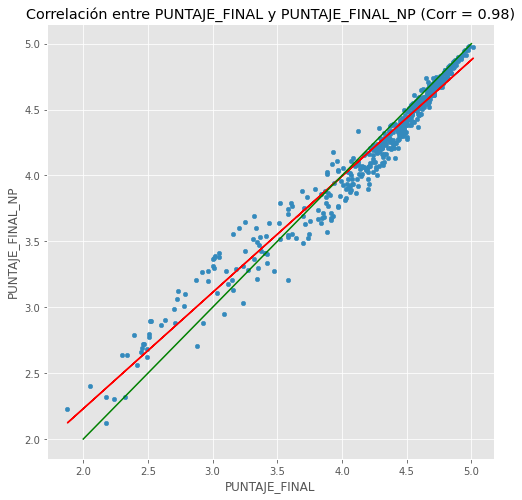

In [ ]:
import numpy as np 

df_adm = df_mag[df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES']

plt.style.use('ggplot')
# Calcular la correlación entre x e y
corr = df_adm['PUNTAJE_FINAL'].corr(df_adm['PUNTAJE_FINAL_NP'])
m, b = np.polyfit(df_adm['PUNTAJE_FINAL'], df_adm['PUNTAJE_FINAL_NP'], 1)

df_adm.plot(kind='scatter', x='PUNTAJE_FINAL', y='PUNTAJE_FINAL_NP',figsize=(8, 8))
plt.plot(df_adm['PUNTAJE_FINAL'], m*df_adm['PUNTAJE_FINAL'] + b, color='red')
plt.plot([2, 5], [2,5], color='green') # Lìnea de identidad
plt.title('Correlación entre PUNTAJE_FINAL y PUNTAJE_FINAL_NP (Corr = {:.2f})'.format(corr))
plt.show()

## **SUBEN DE PUNTAJE**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


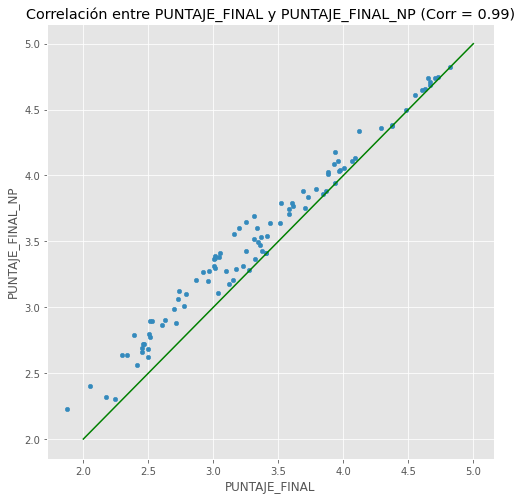

In [ ]:
df_adm = df_mag[(df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES') & (df_mag['DELTA'] == 'SUBE')]

plt.style.use('ggplot')
# Calcular la correlación entre x e y
corr = df_adm['PUNTAJE_FINAL'].corr(df_adm['PUNTAJE_FINAL_NP'])
m, b = np.polyfit(df_adm['PUNTAJE_FINAL'], df_adm['PUNTAJE_FINAL_NP'], 1)

df_adm.plot(kind='scatter', x='PUNTAJE_FINAL', y='PUNTAJE_FINAL_NP',figsize=(8, 8))
#plt.plot(df_adm['PUNTAJE_FINAL'], m*df_adm['PUNTAJE_FINAL'] + b, color='red')
plt.plot([2, 5], [2,5], color='green') # Lìnea de identidad
plt.title('Correlación entre PUNTAJE_FINAL y PUNTAJE_FINAL_NP (Corr = {:.2f})'.format(corr))
plt.show()

## **MANTIENEN PUNTAJE**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


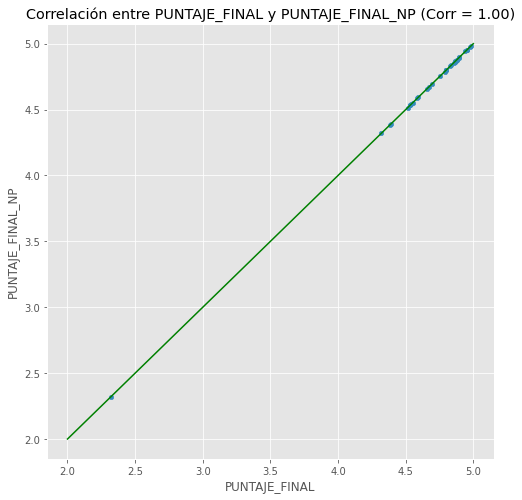

In [ ]:
df_adm = df_mag[(df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES') & (df_mag['DELTA'] == 'MANTIENE')]

plt.style.use('ggplot')
# Calcular la correlación entre x e y
corr = df_adm['PUNTAJE_FINAL'].corr(df_adm['PUNTAJE_FINAL_NP'])
m, b = np.polyfit(df_adm['PUNTAJE_FINAL'], df_adm['PUNTAJE_FINAL_NP'], 1)

df_adm.plot(kind='scatter', x='PUNTAJE_FINAL', y='PUNTAJE_FINAL_NP',figsize=(8, 8))
#plt.plot(df_adm['PUNTAJE_FINAL'], m*df_adm['PUNTAJE_FINAL'] + b, color='red')
plt.plot([2, 5], [2,5], color='green') # Lìnea de identidad
plt.title('Correlación entre PUNTAJE_FINAL y PUNTAJE_FINAL_NP (Corr = {:.2f})'.format(corr))
plt.show()

## **BAJAN PUNTAJE**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


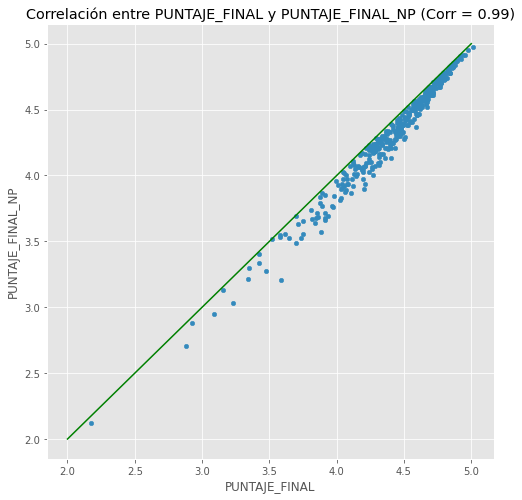

In [ ]:
df_adm = df_mag[(df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES') & (df_mag['DELTA'] == 'BAJA')]

plt.style.use('ggplot')
# Calcular la correlación entre x e y
corr = df_adm['PUNTAJE_FINAL'].corr(df_adm['PUNTAJE_FINAL_NP'])
m, b = np.polyfit(df_adm['PUNTAJE_FINAL'], df_adm['PUNTAJE_FINAL_NP'], 1)

df_adm.plot(kind='scatter', x='PUNTAJE_FINAL', y='PUNTAJE_FINAL_NP',figsize=(8, 8))
#plt.plot(df_adm['PUNTAJE_FINAL'], m*df_adm['PUNTAJE_FINAL'] + b, color='red')
plt.plot([2, 5], [2,5], color='green') # Lìnea de identidad
plt.title('Correlación entre PUNTAJE_FINAL y PUNTAJE_FINAL_NP (Corr = {:.2f})'.format(corr))
plt.show()

In [ ]:
df_mag["DELTA"].value_counts()

BAJA              370
FUERA DE BASES    102
SUBE               97
MANTIENE           36
Name: DELTA, dtype: int64

In [ ]:
df_mag["DELTA"].value_counts('%')*100

BAJA              61.157
FUERA DE BASES    16.860
SUBE              16.033
MANTIENE           5.950
Name: DELTA, dtype: float64

In [ ]:
df_mag["ESTADO_FINAL"].value_counts()

NO SELECCIONADA    325
SELECCIONADA       178
FUERA DE BASES     102
Name: ESTADO_FINAL, dtype: int64

In [ ]:
df_mag["ESTADO_FINAL"].value_counts("%")*100

NO SELECCIONADA    53.719
SELECCIONADA       29.421
FUERA DE BASES     16.860
Name: ESTADO_FINAL, dtype: float64

In [ ]:
df_mag["ESTADO_FINAL_NP"].value_counts()

NO SELECCIONADA    352
SELECCIONADA       151
FUERA DE BASES     102
Name: ESTADO_FINAL_NP, dtype: int64

In [ ]:
df_mag["ESTADO_FINAL_NP"].value_counts("%")*100

NO SELECCIONADA    58.182
SELECCIONADA       24.959
FUERA DE BASES     16.860
Name: ESTADO_FINAL_NP, dtype: float64

In [ ]:
df_mag.groupby(['ESTADO_FINAL'])['GÉNERO'].value_counts().unstack(1)

GÉNERO,Femenino,Masculino
ESTADO_FINAL,,
FUERA DE BASES,58,44
NO SELECCIONADA,183,142
SELECCIONADA,95,83


In [ ]:
df_mag.groupby(['ESTADO_FINAL_NP'])['GÉNERO'].value_counts("%").unstack(1)*100

GÉNERO,Femenino,Masculino
ESTADO_FINAL_NP,,
FUERA DE BASES,56.863,43.137
NO SELECCIONADA,56.534,43.466
SELECCIONADA,52.318,47.682


In [ ]:
df_mag2 = df_mag[df_mag["ESTADO ADMISIBILIDAD"] == "ADMISIBLE"]
df_mag2[["AAP","SUBCRITERIO 1.2", "SUBCRITERIO 1.3", "SUBCRITERIO 1.4", "SUBCRITERIO 2.1", "SUBCRITERIO 2.2","SUBCRITERIO 2.3", "SUBCRITERIO 3.1"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AAP,503.0,4.070,0.638,1.797,3.744,4.236,4.531,5.0
SUBCRITERIO 1.2,503.0,3.847,0.895,0.750,3.250,4.000,4.500,5.0
SUBCRITERIO 1.3,503.0,4.187,0.756,1.000,3.750,4.250,4.750,5.0
SUBCRITERIO 1.4,503.0,4.396,0.616,2.000,4.000,4.500,5.000,5.0
SUBCRITERIO 2.1,503.0,3.811,0.884,0.500,3.250,4.000,4.500,5.0
SUBCRITERIO 2.2,503.0,4.116,0.775,0.500,3.750,4.250,4.750,5.0
SUBCRITERIO 2.3,503.0,4.001,0.832,0.500,3.500,4.250,4.500,5.0
SUBCRITERIO 3.1,503.0,4.363,1.256,0.000,4.475,5.000,5.000,5.0


Tanto el promedio como la mediana del subcriterio 3.1 es mayor al subcriterio 2.2 y 2.3. Esto significa que al otogar mayor ponderación a estos subcriterios, el puntaje promedio del grupo deberia bajar (ver calculos anteriores).

In [ ]:
import numpy as np

bins = np.arange(0, 5.6, 0.1)
bins = bins.round(3).tolist()

bins

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5]

# Admisibles (PUNTAJE FINAL)

[Text(0, 0, '102'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '17'),
 Text(0, 0, '34'),
 Text(0, 0, '24'),
 Text(0, 0, '49'),
 Text(0, 0, '44'),
 Text(0, 0, '31'),
 Text(0, 0, '59'),
 Text(0, 0, '43'),
 Text(0, 0, '37'),
 Text(0, 0, '35'),
 Text(0, 0, '10'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0

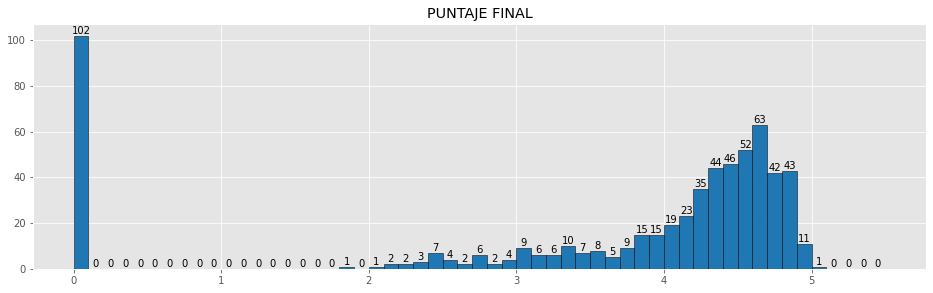

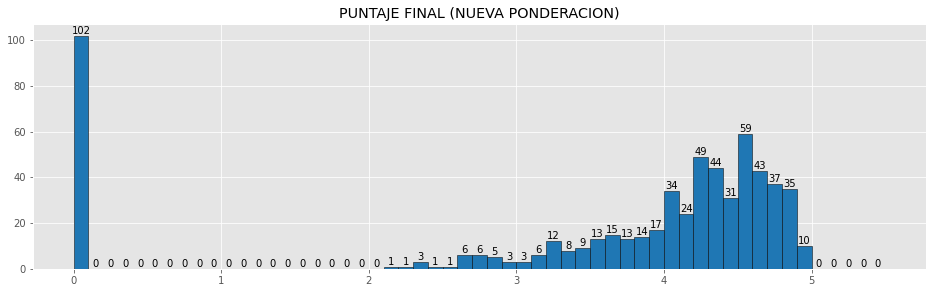

In [ ]:
plt.style.use('ggplot')

#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL")
plt.bar_label(bars)

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[["PUNTAJE_FINAL_NP"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL (NUEVA PONDERACION)")
plt.bar_label(bars)

# Admisibles por Género

[Text(0, 0, '58'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '21'),
 Text(0, 0, '13'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '18'),
 Text(0, 0, '34'),
 Text(0, 0, '26'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '7'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

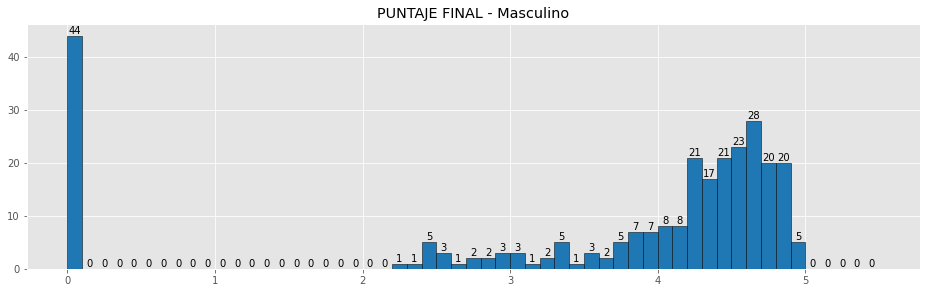

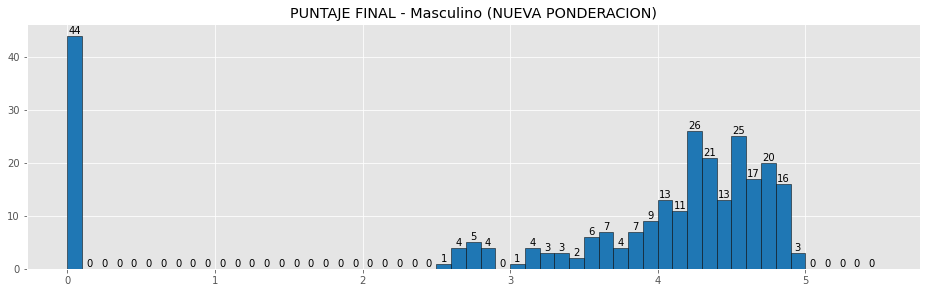

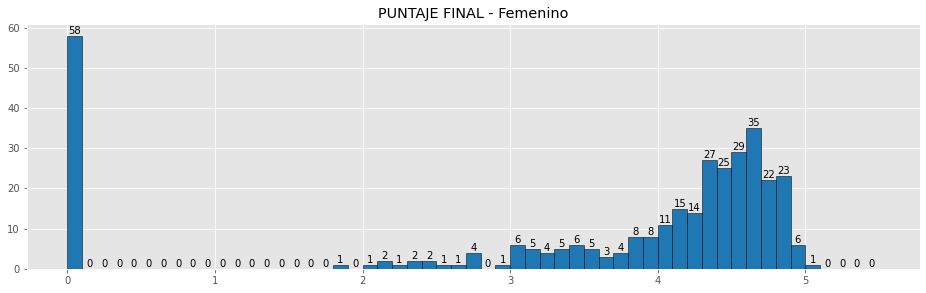

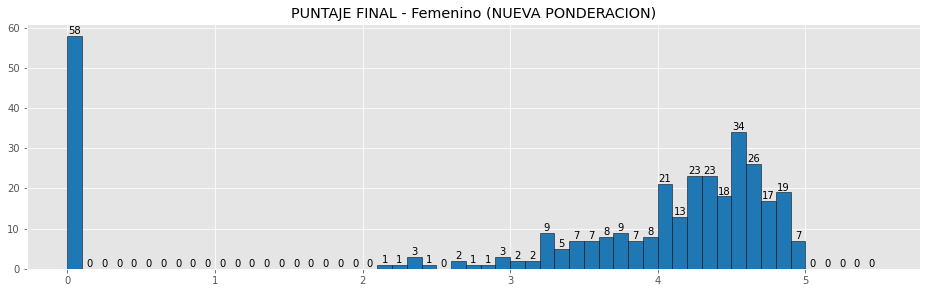

In [ ]:
plt.style.use('ggplot')

#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[df_mag["GÉNERO"] == "Masculino"][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Masculino")
plt.bar_label(bars)

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[df_mag["GÉNERO"] == "Masculino"][["PUNTAJE_FINAL_NP"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Masculino (NUEVA PONDERACION)")
plt.bar_label(bars)


plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[df_mag["GÉNERO"] == "Femenino"][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Femenino")
plt.bar_label(bars)

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[df_mag["GÉNERO"] == "Femenino"][["PUNTAJE_FINAL_NP"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Femenino (NUEVA PONDERACION)")
plt.bar_label(bars)

# Seleccionadas por Género


[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '16'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

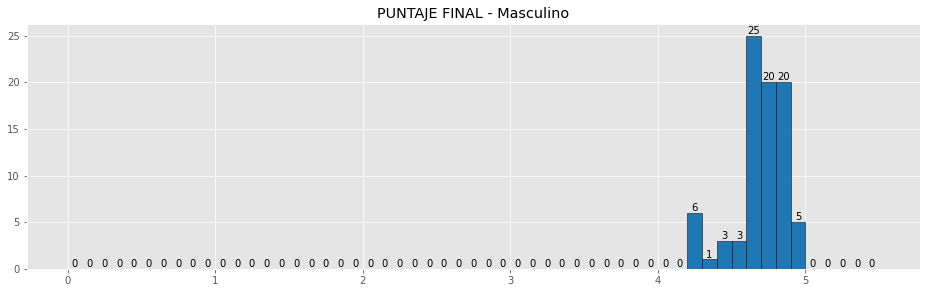

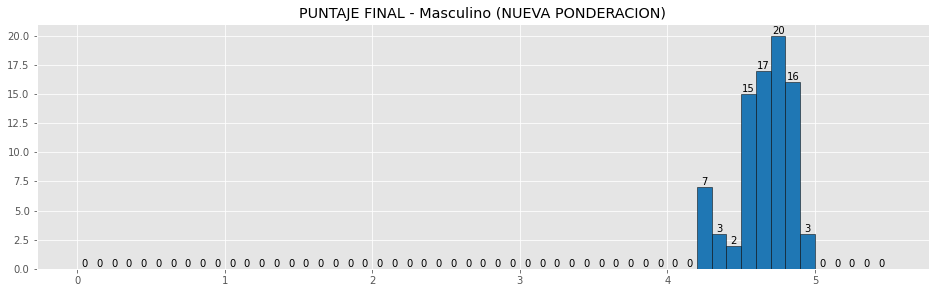

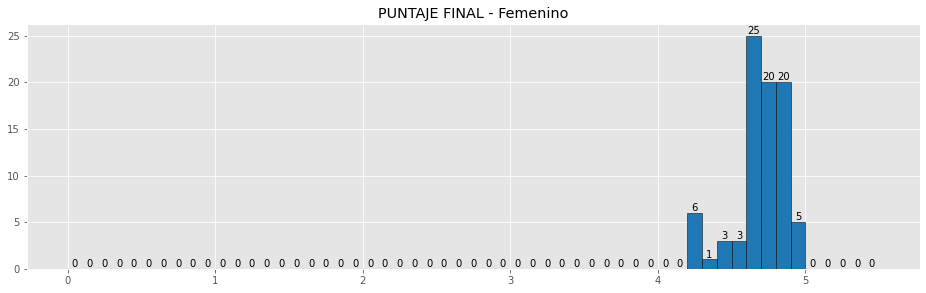

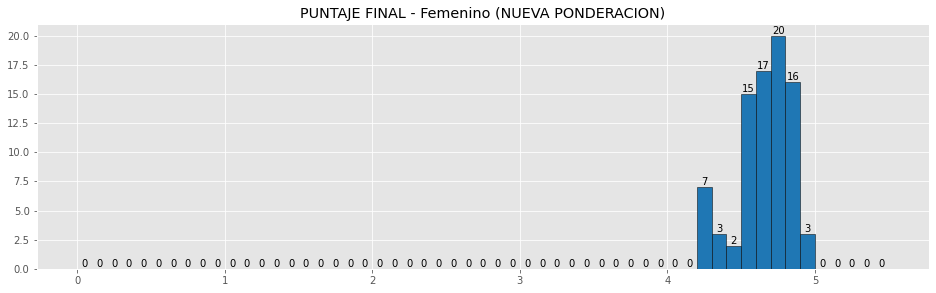

In [ ]:
plt.style.use('ggplot')

#bins = [0.000, 0.250, 0.500, 0.750, 1.000, 1.250, 1.500, 1.750, 2.000, 2.250, 2.500, 2.750, 3.000, 3.250, 3.500, 3.750, 4.000, 4.250, 4.500, 4.750, 5.000, 5.250, 5.500]

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[(df_mag["GÉNERO"] == "Masculino") & (df_mag["ESTADO_FINAL"] == "SELECCIONADA")][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Masculino")
plt.bar_label(bars)

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[(df_mag["GÉNERO"] == "Masculino") & (df_mag["ESTADO_FINAL"] == "SELECCIONADA")][["PUNTAJE_FINAL_NP"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Masculino (NUEVA PONDERACION)")
plt.bar_label(bars)


plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[(df_mag["GÉNERO"] == "Masculino") & (df_mag["ESTADO_FINAL"] == "SELECCIONADA")][["PUNTAJE_FINAL"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Femenino")
plt.bar_label(bars)

plt.figure(figsize=(16, 4.5))
counts, edges, bars = plt.hist(df_mag[(df_mag["GÉNERO"] == "Masculino") & (df_mag["ESTADO_FINAL"] == "SELECCIONADA")][["PUNTAJE_FINAL_NP"]], bins=bins, edgecolor='k', facecolor='#1f77b4')

plt.title("PUNTAJE FINAL - Femenino (NUEVA PONDERACION)")
plt.bar_label(bars)

In [ ]:
df_mag.groupby(["GÉNERO", pd.cut(df_mag.PUNTAJE_FINAL, bins, right=False, include_lowest=True)])["FOLIO"].count().unstack(0).style.background_gradient()

GÉNERO,Femenino,Masculino
PUNTAJE_FINAL,,
"[0.0, 0.1)",58,44
"[0.1, 0.2)",0,0
"[0.2, 0.3)",0,0
"[0.3, 0.4)",0,0
"[0.4, 0.5)",0,0
"[0.5, 0.6)",0,0
"[0.6, 0.7)",0,0
"[0.7, 0.8)",0,0
"[0.8, 0.9)",0,0


In [ ]:
df_mag.groupby(["GÉNERO", pd.cut(df_mag.PUNTAJE_FINAL_NP, bins, right=False, include_lowest=True)])["FOLIO"].count().unstack(0).style.background_gradient()

GÉNERO,Femenino,Masculino
PUNTAJE_FINAL_NP,,
"[0.0, 0.1)",58,44
"[0.1, 0.2)",0,0
"[0.2, 0.3)",0,0
"[0.3, 0.4)",0,0
"[0.4, 0.5)",0,0
"[0.5, 0.6)",0,0
"[0.6, 0.7)",0,0
"[0.7, 0.8)",0,0
"[0.8, 0.9)",0,0


In [ ]:
df_mag[df_mag['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ', 'GÉNERO'])['FOLIO'].count().unstack(1).fillna(0).astype('int').style.background_gradient(cmap= 'YlOrRd')

GÉNERO,Femenino,Masculino
COMITÉ,,
Administración,9,5
Agronomía y Forestal,2,1
Arquitectura,2,6
Arte,2,2
Biología Fisiológica y Bioquímica,3,0
Biotecnología,1,1
Computación e Informática,0,6
Comunicación,1,1
Cs. Matemáticas,1,2


In [ ]:
brecha = df_mag[df_mag['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['COMITÉ'])['GÉNERO'].value_counts("%").sort_values().unstack(1).fillna(0)

brecha['Brecha'] =  brecha['Masculino'] - brecha['Femenino']

brecha = brecha*100

#brecha = brecha.applymap('{:,.3f}'.format)

brecha.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha']).format("{:.2f}%")

GÉNERO,Femenino,Masculino,Brecha
COMITÉ,,,
Administración,64.29%,35.71%,-28.57%
Agronomía y Forestal,66.67%,33.33%,-33.33%
Arquitectura,25.00%,75.00%,50.00%
Arte,50.00%,50.00%,0.00%
Biología Fisiológica y Bioquímica,100.00%,0.00%,-100.00%
Biotecnología,50.00%,50.00%,0.00%
Computación e Informática,0.00%,100.00%,100.00%
Comunicación,50.00%,50.00%,0.00%
Cs. Matemáticas,33.33%,66.67%,33.33%


In [ ]:
df_mag[df_mag['ESTADO_FINAL_NP'] == 'SELECCIONADA'].groupby(['COMITÉ', 'GÉNERO'])['FOLIO'].count().unstack(1).fillna(0).astype('int').style.background_gradient(cmap= 'YlOrRd')

GÉNERO,Femenino,Masculino
COMITÉ,,
Administración,7,5
Agronomía y Forestal,1,1
Arquitectura,1,6
Arte,1,1
Biología Fisiológica y Bioquímica,2,0
Biotecnología,1,1
Computación e Informática,0,6
Comunicación,1,1
Cs. Matemáticas,1,2


In [ ]:
brecha_np = df_mag[df_mag['ESTADO_FINAL_NP'] == 'SELECCIONADA'].groupby(['COMITÉ'])['GÉNERO'].value_counts("%").sort_values().unstack(1).fillna(0)

brecha_np['Brecha'] =  brecha_np['Masculino'] - brecha_np['Femenino']

brecha_np = brecha_np*100

#brecha_np = brecha_np.applymap('{:,.3f}'.format)

brecha_np.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha']).format("{:.2f}%")

GÉNERO,Femenino,Masculino,Brecha
COMITÉ,,,
Administración,58.33%,41.67%,-16.67%
Agronomía y Forestal,50.00%,50.00%,0.00%
Arquitectura,14.29%,85.71%,71.43%
Arte,50.00%,50.00%,0.00%
Biología Fisiológica y Bioquímica,100.00%,0.00%,-100.00%
Biotecnología,50.00%,50.00%,0.00%
Computación e Informática,0.00%,100.00%,100.00%
Comunicación,50.00%,50.00%,0.00%
Cs. Matemáticas,33.33%,66.67%,33.33%


In [ ]:
OCDE = df_mag[df_mag['ESTADO_FINAL'] == 'SELECCIONADA'].groupby(['Área OCDE',])['GÉNERO'].value_counts().unstack(1).fillna(0).astype(int)
OCDE['Brecha (sel)'] = OCDE['Masculino'] - OCDE['Femenino'] 
OCDE.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha (sel)'])

GÉNERO,Femenino,Masculino,Brecha (sel)
Área OCDE,,,
CIENCIAS AGRICOLAS,3,1,-2
CIENCIAS MEDICAS Y DE SALUD,7,3,-4
CIENCIAS NATURALES,14,12,-2
CIENCIAS SOCIALES,54,44,-10
HUMANIDADES,11,12,1
INGENIERIA Y TECNOLOGIA,6,11,5


In [ ]:
OCDE = df_mag[df_mag['ESTADO_FINAL_NP'] == 'SELECCIONADA'].groupby(['Área OCDE'])['GÉNERO'].value_counts().unstack(1).fillna(0).astype(int)
OCDE['Brecha (sel)'] = OCDE['Masculino'] - OCDE['Femenino'] 
OCDE.style.background_gradient(cmap= 'YlOrRd', subset=['Brecha (sel)'])

GÉNERO,Femenino,Masculino,Brecha (sel)
Área OCDE,,,
CIENCIAS AGRICOLAS,2,1,-1
CIENCIAS MEDICAS Y DE SALUD,7,2,-5
CIENCIAS NATURALES,12,11,-1
CIENCIAS SOCIALES,44,38,-6
HUMANIDADES,8,11,3
INGENIERIA Y TECNOLOGIA,6,9,3


In [ ]:
df_mag.groupby('DELTA')['ESTADO_FINAL'].value_counts().to_frame()

ESTADO_FINAL
DELTA          ESTADO_FINAL                 
BAJA           NO SELECCIONADA           228
               SELECCIONADA              142
FUERA DE BASES FUERA DE BASES            102
MANTIENE       SELECCIONADA               26
               NO SELECCIONADA            10
SUBE           NO SELECCIONADA            87
               SELECCIONADA               10

In [ ]:
df_mag.groupby('DELTA')['ESTADO_FINAL_NP'].value_counts().to_frame()

ESTADO_FINAL_NP
DELTA          ESTADO_FINAL_NP                 
BAJA           NO SELECCIONADA              256
               SELECCIONADA                 114
FUERA DE BASES FUERA DE BASES               102
MANTIENE       SELECCIONADA                  26
               NO SELECCIONADA               10
SUBE           NO SELECCIONADA               86
               SELECCIONADA                  11

In [ ]:
df_mag[df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES'].groupby(['COMITÉ'])['DELTA'].value_counts().to_frame()

DELTA
COMITÉ                                         DELTA          
Administración                                 BAJA         21
                                               SUBE          4
Agronomía y Forestal                           BAJA          5
                                               MANTIENE      1
Arquitectura                                   BAJA         17
                                               SUBE          6
                                               MANTIENE      1
Arte                                           BAJA          9
                                               SUBE          7
                                               MANTIENE      1
Biología Fisiológica y Bioquímica              BAJA          4
                                               MANTIENE      1
                                               SUBE          1
Biotecnología                                  BAJA          6
                                               SUBE          3
Computación e Informática                      BAJA          6
                                               MANTIENE      2
                                               SUBE          2
Comunicación                                   BAJA          5
                                               SUBE          5
Cs. Matemáticas                                BAJA          3
                                               SUBE          1
Cs. Médicas                                    BAJA         19
                                               SUBE          6
                                               MANTIENE      5
Cs. Políticas y Estudios Internacionales       BAJA         13
                                               SUBE          8
Cs. Veterinarias                               BAJA          2
Cs. de la Ingeniería I                         BAJA          6
                                               MANTIENE      2
Cs. de la Ingeniería II                        BAJA         23
                                               SUBE          5
                                               MANTIENE      1
Derecho                                        BAJA         51
                                               SUBE          6
                                               MANTIENE      2
Diseño                                         BAJA          5
                                               SUBE          2
Ecología y Ciencias Naturales                  BAJA         15
                                               SUBE          2
Economía                                       BAJA          8
                                               MANTIENE      2
Educación I                                    SUBE          6
                                               BAJA          5
                                               MANTIENE      1
Educación II                                   BAJA         33
                                               SUBE          7
                                               MANTIENE      3
Filosofía                                      BAJA          3
Física y Astronomía                            MANTIENE      2
                                               BAJA          1
Geología y Oceanografía                        BAJA          5
                                               SUBE          5
Historia, Antropología y Arqueología           BAJA          7
                                               MANTIENE      3
                                               SUBE          2
Letras                                         BAJA          9
                                               SUBE          4
                                               MANTIENE      3
Políticas Públicas y Administración del Estado BAJA         33
                                               SUBE          4
                                               MANTIENE      2
Psicología               

In [ ]:
df_mag['DELTA'].value_counts().to_frame()

,DELTA
BAJA,370
FUERA DE BASES,102
SUBE,97
MANTIENE,36


In [ ]:
df_mag[df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES'].groupby(['COMITÉ','ESTADO_FINAL','ESTADO_FINAL_NP'])['DELTA'].value_counts().to_frame()

DELTA
COMITÉ                                         ESTADO_FINAL    ESTADO_FINAL_NP DELTA          
Administración                                 NO SELECCIONADA NO SELECCIONADA BAJA          8
                                                                               SUBE          3
                                               SELECCIONADA    NO SELECCIONADA BAJA          2
                                                               SELECCIONADA    BAJA         11
                                                                               SUBE          1
Agronomía y Forestal                           NO SELECCIONADA NO SELECCIONADA BAJA          3
                                               SELECCIONADA    NO SELECCIONADA BAJA          1
                                                               SELECCIONADA    BAJA          1
                                                                               MANTIENE      1
Arquitectura                                   NO SELECCIONADA NO SELECCIONADA BAJA         11
                                                                               SUBE          5
                                               SELECCIONADA    NO SELECCIONADA BAJA          1
                                                               SELECCIONADA    BAJA          5
                                                                               MANTIENE      1
                                                                               SUBE          1
Arte                                           NO SELECCIONADA NO SELECCIONADA SUBE          7
                                                                               BAJA          6
                                               SELECCIONADA    NO SELECCIONADA BAJA          2
                                                               SELECCIONADA    BAJA          1
                                                                               MANTIENE      1
Biología Fisiológica y Bioquímica              NO SELECCIONADA NO SELECCIONADA BAJA          2
                                                                               SUBE          1
                                               SELECCIONADA    NO SELECCIONADA BAJA          1
                                                               SELECCIONADA    BAJA          1
                                                                               MANTIENE      1
Biotecnología                                  NO SELECCIONADA NO SELECCIONADA BAJA          4
                                                                               SUBE          3
                                               SELECCIONADA    SELECCIONADA    BAJA          2
Computación e Informática                      NO SELECCIONADA NO SELECCIONADA BAJA          2
                                                                               SUBE          2
                                               SELECCIONADA    SELECCIONADA    BAJA          4
                                                                               MANTIENE      2
Comunicación                                   NO SELECCIONADA NO SELECCIONADA SUBE          5
                                                                               BAJA          3
                                               SELECCIONADA    SELECCIONADA    BAJA          2
Cs. Matemáticas                                NO SELECCIONADA NO SELECCIONADA BAJA          1
                                               SELECCIONADA    SELECCIONADA    BAJA          2
                                                                               SUBE          1
Cs. Médicas                                    NO SELECCIONADA NO SELECCIONADA BAJA         13
                                                                               SUBE          5
                                                                               MANTIENE      2
    

In [ ]:
df_mag[df_mag['ESTADO ADMISIBILIDAD'] != 'FUERA DE BASES'].groupby(['COMITÉ','ESTADO_FINAL','ESTADO_FINAL_NP','DELTA'])['GÉNERO'].value_counts().unstack(4).fillna(0).astype(int)

GÉNERO                                                                                   Femenino  \
COMITÉ                                         ESTADO_FINAL    ESTADO_FINAL_NP DELTA                
Administración                                 NO SELECCIONADA NO SELECCIONADA BAJA             4   
                                                                               SUBE             2   
                                               SELECCIONADA    NO SELECCIONADA BAJA             2   
                                                               SELECCIONADA    BAJA             6   
                                                                               SUBE             1   
Agronomía y Forestal                           NO SELECCIONADA NO SELECCIONADA BAJA             2   
                                               SELECCIONADA    NO SELECCIONADA BAJA             1   
                                                               SELECCIONADA    BAJA             1   
                                                                               MANTIENE         0   
Arquitectura                                   NO SELECCIONADA NO SELECCIONADA BAJA             5   
                                                                               SUBE             2   
                                               SELECCIONADA    NO SELECCIONADA BAJA             1   
                                                               SELECCIONADA    BAJA             0   
                                                                               MANTIENE         1   
                                                                               SUBE             0   
Arte                                           NO SELECCIONADA NO SELECCIONADA BAJA             4   
                                                                               SUBE             3   
                                               SELECCIONADA    NO SELECCIONADA BAJA             1   
                                                               SELECCIONADA    BAJA             1   
                                                                               MANTIENE         0   
Biología Fisiológica y Bioquímica              NO SELECCIONADA NO SELECCIONADA BAJA             1   
                                                                               SUBE             1   
                                               SELECCIONADA    NO SELECCIONADA BAJA             1   
                                                               SELECCIONADA    BAJA             1   
                                                                               MANTIENE         1   
Biotecnología                                  NO SELECCIONADA NO SELECCIONADA BAJA             2   
                                                                               SUBE             3   
                                               SELECCIONADA    SELECCIONADA    BAJA             1   
Computación e Informática                      NO SELECCIONADA NO SELECCIONADA BAJA             1   
                                                                               SUBE             0   
                                               SELECCIONADA    SELECCIONADA    BAJA             0   
                                                                               MANTIENE         0   
Comunicación                                   NO SELECCIONADA NO SELECCIONADA BAJA             2   
                                                                               SUBE             2   
                                               SELECCIONADA    SELECCIONADA    BAJA             1   
Cs. Matemáticas                                NO SELECCIONADA NO SELECCIONADA BAJA             0   
                                               SELECCIONADA    SELECCIONADA    BAJA             1   
                                                             